# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Ruijie Zhang
*   Your **student number**: 1003812671



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

# df=pd.read_csv('F16L.csv',skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

In [ ]:
df.head()

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006


In [ ]:
### YOUR CODE HERE ###
# print(df)

X = df.drop(['Goal'],axis=1)
y = df['Goal']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# 1-0.7*len(X)/len(X_train)=0.17643535552323097
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1-0.7*len(X)/len(X_train), random_state=1)

print('validation dataset is {} % of the dataset '.format(np.round(100*len(X_val)/len(X),2)))
print('training dataset is {} % of the dataset '.format(np.round(100*len(X_train)/len(X),2)))
print('Testing dataset is {} % of the dataset '.format(np.round(100*len(X_test)/len(X),2)))

validation dataset is 15.0 % of the dataset 
training dataset is 69.99 % of the dataset 
Testing dataset is 15.0 % of the dataset 


Question 3

Iterations: It is the number of batches needed to complete one epoch 

Epoch : One Epoch is when an entire dataset is passed forward and backward through the  neural network only once.

For example, we can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch .

Batch Gradient Descent: Batch Size = Size of Training Set

Stochastic Gradient Descent: Batch Size = 1

Mini-Batch Gradient Descent: 1 < Batch Size < Size of Training Set



## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:

from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))
    
def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights
  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)
  #plt.scatter(X_train[:,1], y_train, label='Data')
  #plt.scatter(X_train[:,1], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  CT = 1.001*RMSE_valid
  #plt.legend()
  #plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid,CT


In [ ]:
one_train = np.ones(np.shape(X_train[:,:1]))
one_valid = np.ones(np.shape(X_val[:,:1]))
X_train_1f = np.hstack((one_train, X_train))
X_val_1f= np.hstack((one_valid, X_val))

In [ ]:
Result = Direct_sol( X_train_1f, y_train , X_val_1f, y_val)

RMSE on training set:  0.00020247342647365676
RMSE on validation set:  0.0001968044025659902


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $w_t = w_{t-1} - \alpha~g_t$
 
where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
print('The RMSE(GD) is the 1.001*RMSE of validation data, CT = ',Result[5])
CT = Result[5]

The RMSE(GD) is the 1.001*RMSE of validation data, CT =  0.00019700120696855615


In [ ]:
w_initial = 0.001*np.random.random(41).reshape(1,-1) ### Inital weights
w_initial

array([[6.99815943e-04, 3.19790156e-05, 6.75760777e-04, 7.01919407e-04,
        4.38405195e-04, 3.89480301e-04, 9.05042827e-04, 6.34352878e-04,
        7.23306582e-04, 1.06400922e-04, 3.31166582e-04, 3.53036572e-04,
        6.64400609e-04, 3.66391419e-04, 2.66798314e-04, 1.47147655e-04,
        6.60472078e-05, 7.81611266e-04, 1.29195620e-04, 1.86215302e-04,
        1.41410744e-04, 4.51555476e-04, 2.01780613e-04, 7.91921769e-04,
        1.55448237e-04, 9.22243998e-05, 9.21503765e-04, 2.26989165e-04,
        5.87083085e-04, 8.30210255e-04, 2.27596439e-04, 6.15289795e-04,
        5.98955085e-04, 6.39576688e-04, 2.63577246e-04, 2.12694006e-04,
        5.58734445e-05, 8.56488270e-04, 4.63262169e-04, 2.95991534e-04,
        4.34957129e-04]])

In [ ]:
learning_rate = 0.01  ### Learning rate
rmse_training_array=[]
rmse_validation_array=[]

In [ ]:
import time
start_time = time.time() ## Records current time
Epoch_to_converge = 0 
for epoch in range (0, 3000): 
  y_pred_train= np.dot(X_train_1f,w_initial.T).reshape (-1,1)
  y_pred_val= np.dot(X_val_1f,w_initial.T).reshape (-1,1)
  rmse_validation_array.append(rmse(y_pred_val,y_val))
  rmse_training_array.append(rmse(y_pred_train,y_train))
  if rmse_validation_array[-1]<CT:
    if Epoch_to_converge==0:
      Epoch_to_converge = epoch
      print('The model has converged')
  else:
    gradient = (1/len(y_pred_train) * np.dot(X_train_1f.T, y_pred_train-y_train[:,np.newaxis])).reshape(1,-1)
    w_initial  = w_initial - learning_rate * gradient ### weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

The model has converged
--- Total Training Time: 1.7745466232299805 (s) ---


In [ ]:
print('The model has converged, the number of epochs to converge is {}'.format(Epoch_to_converge))

The model has converged, the number of epochs to converge is 1754


validation_X of data:  (2063, 40)
w:  (1, 41)
y:  (2063, 1)
validation_y of data:  (2063,)
gradient:  (1, 41)


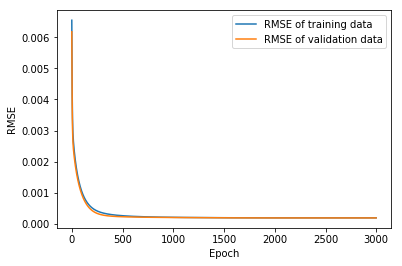

In [ ]:
print ("validation_X of data: ", X_val.shape)
print ("w: ", w_initial.shape)
print ("y: ", y_pred_val.shape)
print ("validation_y of data: ", y_val.shape)
print ("gradient: ", gradient.shape)
plt.plot(rmse_training_array,label = 'RMSE of training data')
plt.plot(rmse_validation_array,label = 'RMSE of validation data')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The following plots show the  RMSE of both training set and validation set in the first 100 epoches.

We could find at this time the RMSE is continuously decreasing which means it is under-fitting . 


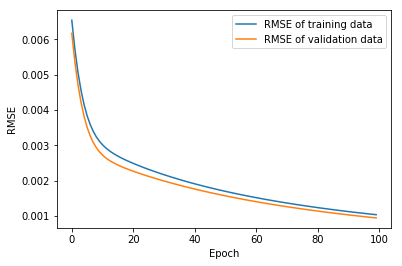

In [ ]:
plt.plot(rmse_training_array[:100],label = 'RMSE of training data')
plt.plot(rmse_validation_array[:100],label = 'RMSE of validation data')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The following plots show the  RMSE of both training set and validation set in the last 2000 epoches.
Based on the results we know when epoch equals to 751 the model has converged , therefore , at this time there is no space to decrease the RMSE . The model is potential to  over-fitting . 


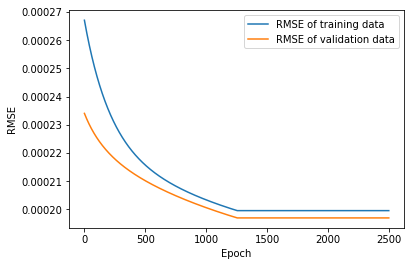

In [ ]:
plt.plot(rmse_training_array[500:],label = 'RMSE of training data')
plt.plot(rmse_validation_array[500:],label = 'RMSE of validation data')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
batch_size=32#Default
def minibatch(X,y,X_val,y_val,batch_size=batch_size,learning_rate=learning_rate,CT=CT):
    Converged_point = []
    Converged = False
    batch_index = []
    rmse_mini =dict()
    rmse_val=dict()
    elapsed_time=[]
    W = 0.001*np.random.random(41).reshape(1,-1) ### Inital weights
    start_time = time.time() ## Records current time
    for epoch in range (5): 
        #print('Start training the epoch {}'.format(epoch+1))
        rmse_mini_list =[]
        rmse_val_list=[]
        permutation =list(np.random.permutation(X.shape[0]))
        shuffled_X = X[permutation,:]
        shuffled_y = y[permutation,:]
        for i in range(len(shuffled_y)):
            y_pred_train= np.dot(shuffled_X[i:i+batch_size],W.T).reshape (-1,1)
            y_pred_val= np.dot(X_val_1f,W.T).reshape (-1,1)
            val_RMSE=rmse(y_pred_val,y_val)
            rmse_val_list.append(val_RMSE)
            RMSE = rmse(y_pred_train,shuffled_y[i:i+batch_size])
            if RMSE<CT:
                #Converged_point.append(i)
                batch_index.append(batch_size)
                Converged = True
                #print('The epoch {} has converged'.format(epoch+1))
                break
            rmse_mini_list.append(RMSE)
            #print('shuffled_X.shape',shuffled_X.shape)
            gradient = (1/len(y_pred_train) * np.dot(shuffled_X[i:i+batch_size].T, y_pred_train-shuffled_y[i:i+batch_size])).reshape(1,-1)
            #print('gradient shape : ', gradient.shape)
            #print('W shape : ', w_initial.shape)
            W  = W - learning_rate * gradient ### weight update
        
        rmse_mini[str(epoch)]=rmse_mini_list
        rmse_val[str(epoch)]=rmse_val_list
        elapsed_time.append(time.time() - start_time)
    return W,rmse_mini,rmse_val,elapsed_time,Converged_point,list(set(batch_index)),Converged


In [ ]:
# Results_train = minibatch(X_train_1f,y_train[:,np.newaxis],X_val_1f,y_val[:,np.newaxis],learning_rate=0.01,batch_size=32)


Start batch size with 2 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 4 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 8 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 16 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 32 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 64 
This batch size has converged 
——————————————————————————————————————————————
Start batch size with 128 
This batch size has converged 
——————————————————————————————————————————————


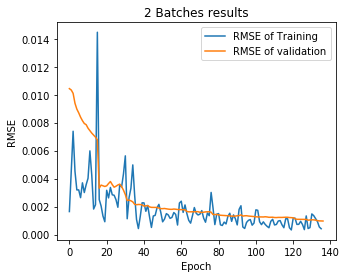

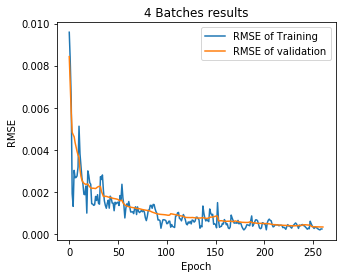

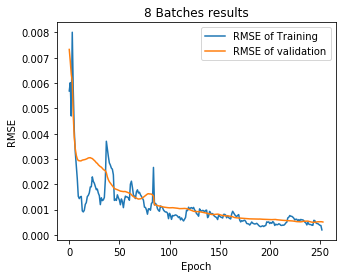

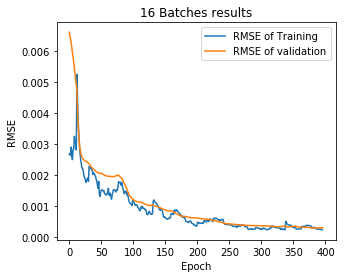

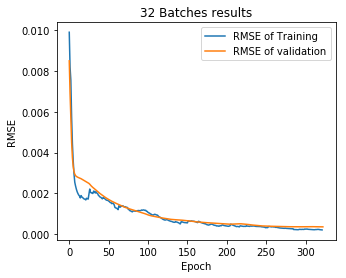

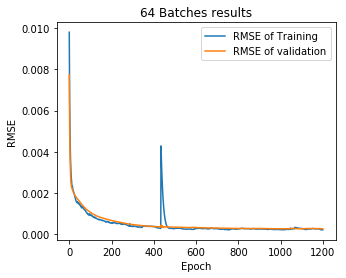

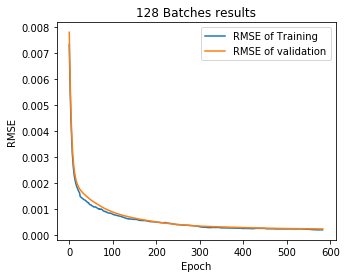

In [ ]:
bs=[2,4,8,16,32,64,128] 

elapsed_time_list = dict()
for item in bs:
    print('Start batch size with {} '.format(item))
    Results_train = minibatch(X_train_1f,y_train[:,np.newaxis],X_val_1f,y_val[:,np.newaxis],learning_rate=0.01,batch_size=item)
    if Results_train[6]:
        print('This batch size has converged ')
        fig = plt.figure(figsize=(5,4))
        plt.plot(Results_train[1]['0'],label = 'RMSE of Training')
        plt.plot(Results_train[2]['0'],label = 'RMSE of validation')
        plt.title(str(item)+' Batches results')
        plt.xlabel('Epoch')
        plt.ylabel('RMSE')
        plt.legend()

    elapsed_time_list[str(item)]=Results_train[3][-1]
    print('——————————————————————————————————————————————')


Text(0,0.5,'Total time')

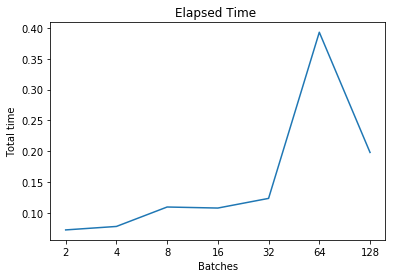

In [ ]:
plt.plot(elapsed_time_list.keys(),elapsed_time_list.values())
plt.title('Elapsed Time ')
plt.xlabel('Batches')
plt.ylabel('Total time')

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [ ]:
GAMMA=0.9
def Momentum(X,y,X_val,y_val,batch_size=32,learning_rate=learning_rate,CT=CT,gamma=GAMMA):
    Converged = False
    batch_index = []
    rmse_mini =dict()
    rmse_val=dict()
    elapsed_time=[]
    W = 0.001*np.random.random(41).reshape(1,-1)
    W_2 = W
    vt  = np.zeros(W.shape)
    start_time = time.time() ## Records current time
    for epoch in range (10): 
        #print('Start training the epoch {}'.format(epoch+1))
        rmse_mini_list =[]
        rmse_val_list=[]
        permutation =list(np.random.permutation(X.shape[0]))
        shuffled_X = X[permutation,:]
        shuffled_y = y[permutation,:]
        for i in range(len(shuffled_y)):
            y_pred_train= np.dot(shuffled_X[i:i+batch_size],W.T).reshape (-1,1)
            y_pred_val= np.dot(X_val_1f,W.T).reshape (-1,1)
            val_RMSE=rmse(y_pred_val,y_val)
            rmse_val_list.append(val_RMSE)
            RMSE = rmse(y_pred_train,shuffled_y[i:i+batch_size])
            if RMSE<CT:
                #Converged_point.append(i)
                batch_index.append(batch_size)
                Converged = True
            rmse_mini_list.append(RMSE)
            #print('shuffled_X.shape',shuffled_X.shape)
            gradient = (1/len(y_pred_train) * np.dot(shuffled_X[i:i+batch_size].T, y_pred_train-shuffled_y[i:i+batch_size])).reshape(1,-1)
            #print('gradient shape : ', gradient.shape)
            #print('W shape : ', w_initial.shape)
            
            vt = gamma * vt + (1-gamma ) *gradient
            W  = W - learning_rate * vt ### weight update
            W_2 = W_2 -learning_rate* gradient
        
        rmse_mini[str(epoch)]=rmse_mini_list
        rmse_val[str(epoch)]=rmse_val_list
        elapsed_time.append(time.time() - start_time)
    return W,rmse_mini,rmse_val,elapsed_time,W_2


In [ ]:
# Results_train = minibatch(X_train_1f,y_train[:,np.newaxis],X_val_1f,y_val[:,np.newaxis],learning_rate=0.01,batch_size=32)

Result_momentum = Momentum(X_train_1f,y_train[:,np.newaxis],X_val_1f,y_val[:,np.newaxis],batch_size=32,learning_rate=learning_rate,CT=CT,gamma=GAMMA)

In [ ]:
gamma_LIST = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
eachtime = []
for GAMMA in gamma_LIST:
    Result_momentum = Momentum(X_train_1f,y_train[:,np.newaxis],X_val_1f,y_val[:,np.newaxis],batch_size=32,learning_rate=learning_rate,CT=CT,gamma=GAMMA)
    eachtime.append(Result_momentum[3][-1])
eachtime

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


[20.033992052078247,
 19.641873598098755,
 19.886975526809692,
 20.011560678482056,
 19.332066774368286,
 18.63800549507141,
 17.958482027053833,
 18.58853816986084,
 17.812474966049194,
 18.921339988708496]

Text(0.5,1,'Momentums vs Tme')

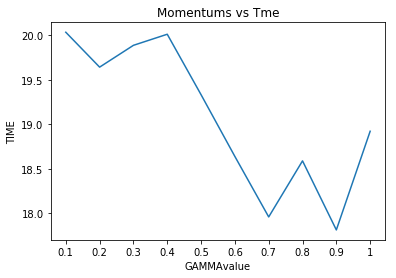

In [ ]:
plt.plot(eachtime)
plt.xlabel('GAMMAvalue')
plt.ylabel('TIME')
plt.xticks(range(10),[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title('Momentums vs Tme')

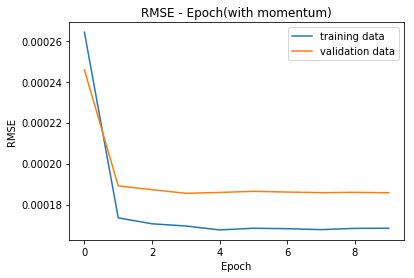

In [ ]:
epoch_RMSE_train =[]
epoch_RMSE_val =[]
for item in Result_momentum[2]:
    epoch_RMSE_val.append(np.mean(Result_momentum[2][str(item)]))
for item in Result_momentum[1]:
    epoch_RMSE_train.append(np.mean(Result_momentum[1][str(item)]))


plt.plot(epoch_RMSE_train,label='training data')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE - Epoch(with momentum)')

plt.plot(epoch_RMSE_val,label='validation data')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
print('The Weights with momentum: ', Result_momentum[0])
print()
print('The Weights without momentum', Result_momentum[4])


The Weights with momentum:  [[-8.76895856e-04  8.92863799e-05  1.48898171e-05 -1.09836953e-04
   2.02448005e-05  1.39751222e-04 -7.47508231e-05  2.40633594e-04
  -2.90313371e-05  1.88577516e-05  1.79299613e-05  1.19422785e-04
  -4.41283603e-04  3.90630903e-04 -2.50209111e-04  1.91834553e-04
  -4.02204467e-04  2.40428722e-04 -5.20826971e-04  4.23214047e-04
   2.43083282e-04 -6.23904217e-05 -2.00436126e-04  2.91678357e-04
  -3.42407650e-04 -3.21601917e-06  5.97776192e-06 -1.75653631e-05
  -6.64395215e-06 -6.83248440e-06  1.14088886e-05 -1.58237062e-05
  -7.49854037e-07  2.48415992e-06  5.58492028e-06 -8.52497692e-06
  -2.77345399e-06 -1.03298497e-05  8.66394345e-07 -3.74517698e-05
   4.40878247e-05]]

The Weights without momentum [[-8.77343107e-04  9.30796850e-05  9.56444414e-06 -1.03189160e-04
   1.97379851e-05  1.37091244e-04 -7.34255733e-05  2.44423763e-04
  -2.97458199e-05  1.51228968e-05  1.44448445e-05  1.19278187e-04
  -4.41473969e-04  3.90440527e-04 -2.50397314e-04  1.91646322e-0

Text(0, 0.5, 'Y')

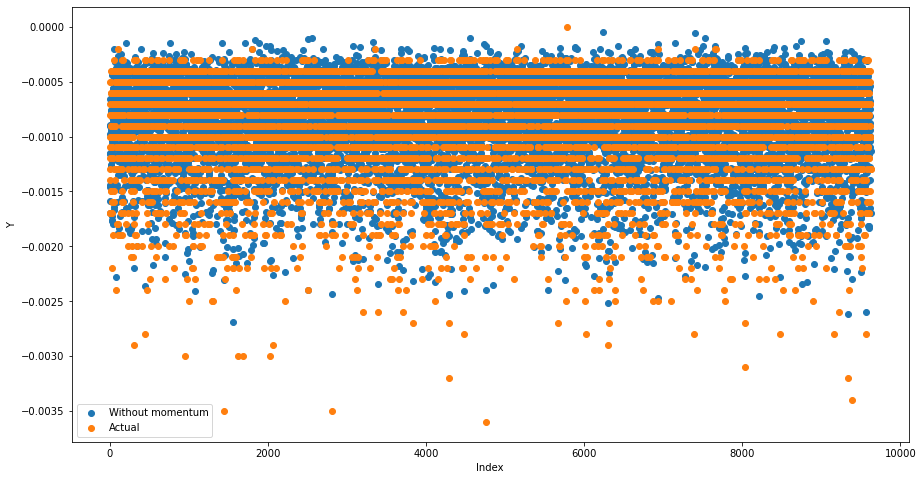

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.scatter(np.arange(0,len(X_train),1),np.dot(X_train_1f,Result_momentum[0].T),label ='Without momentum')
plt.scatter(np.arange(0,len(X_train),1),y_train,label ='Actual')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

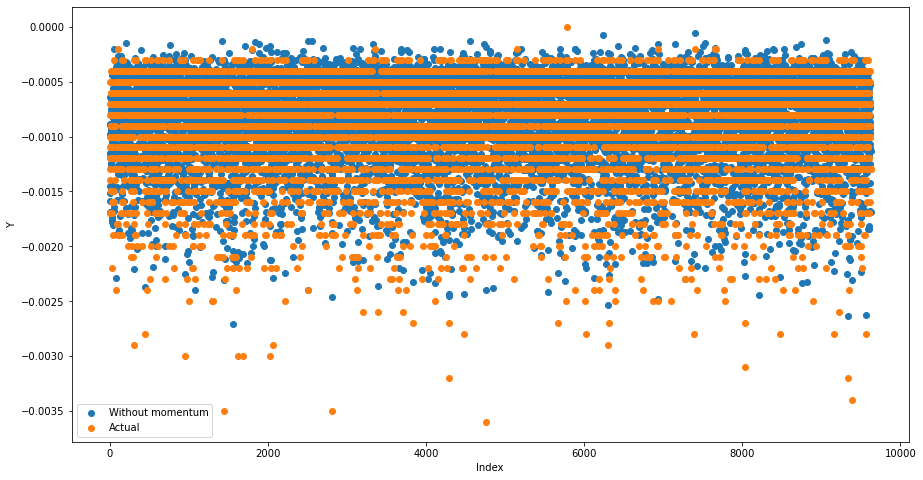

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.scatter(np.arange(0,len(X_train),1),np.dot(X_train_1f,Result_momentum[4].T),label ='Without momentum')
plt.scatter(np.arange(0,len(X_train),1),y_train,label ='Actual')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Y')

After introducing the momentum, instead of having data with a lot of noise, we got much smoother line, which is closer to the original function than data we had. 

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

I would like to use the Mini batch method since I can use different batch size and iterate my training process.  In addition , introducing momentum could help me get a much smoother result and fit the curve . From  the  result in the previous question we could find the RMSE using momentum is smaller than other methods. 